In [22]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
mpl.style.use("ggplot")
print(mpl.__version__)# >= 2.0.0

from plotly import __version__
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
print (__version__) 



import seaborn as sns
from bokeh.plotting import figure, show, output_notebook

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import streamlit as st


3.10.0
5.24.1


In [23]:
# input database
df_nike=pd.read_csv("nike_sales_2024.csv")

In [24]:
# prepare all data  
sort_month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_nike.rename(columns = {"Region": "Country"}, inplace = True)


In [25]:
df_nike.head()

,Month,Country,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [26]:
print(df_nike.shape)

(1000, 10)


In [27]:
print(df_nike['Country'].unique())

['India' 'Greater China' 'Japan' 'Europe' 'South Korea' 'America'
 'Southeast Asia']


In [51]:
print(df_nike['Main_Category'].unique())

['Equipment' 'Apparel' 'Footwear']


In [52]:
print(df_nike['Sub_Category'].unique())

['Bags' 'Accessories' 'Tops' 'Cricket' 'Socks' 'Performance' 'Outerwear'
 'Lifestyle' 'Running' 'Basketball' 'Football']


In [53]:
print(df_nike['Product_Line'].unique())

['Gym Sack' 'Hats' 'Tech Fleece' 'Vapor Cricket' 'Performance Socks'
 'Dri-FIT' 'Therma-FIT' 'Bags' 'Crew Socks' 'Backpack' 'Rain Jacket'
 'Air Force 1' 'React Infinity' 'Windrunner' 'Air Jordan'
 'Compression Wear' 'Air Zoom' 'Mercurial' 'Air Max' 'KD Series'
 'LeBron Series' 'Phantom Vision' 'Blazer' 'Pegasus']


In [54]:
print(df_nike['Price_Tier'].unique())

['Budget' 'Mid-Range' 'Premium']


In [29]:
df_nike.describe().style.format('{:,.2f}') # format data 

,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,"1,000.00","1,000.00","1,000.00","1,000.00"
mean,"28,498.95","5,039,576.41",70.04,176.32
std,"12,926.50","3,267,216.81",11.75,75.26
min,"5,028.00","287,400.00",50.00,50.00
25%,"17,554.25","2,344,675.00",60.00,110.00
50%,"28,685.00","4,328,020.00",71.00,180.00
75%,"40,026.00","7,264,942.50",80.00,240.00
max,"49,992.00","14,864,700.00",90.00,300.00


Confirm that the feature types and the dataset 

In [30]:
print(f"Shape of the dataset is {df_nike.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(df_nike.dtypes)

Shape of the dataset is (1000, 10) 

Data types are below where 'object' indicates a string type: 
Month                      object
Country                    object
Main_Category              object
Sub_Category               object
Product_Line               object
Price_Tier                 object
Units_Sold                  int64
Revenue_USD                 int64
Online_Sales_Percentage     int64
Retail_Price                int64
dtype: object


In [31]:
# check if there have null value exist
df_nike.isnull().sum()

Month                      0
Country                    0
Main_Category              0
Sub_Category               0
Product_Line               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64

Use boxplot to check if there are outliers in the data

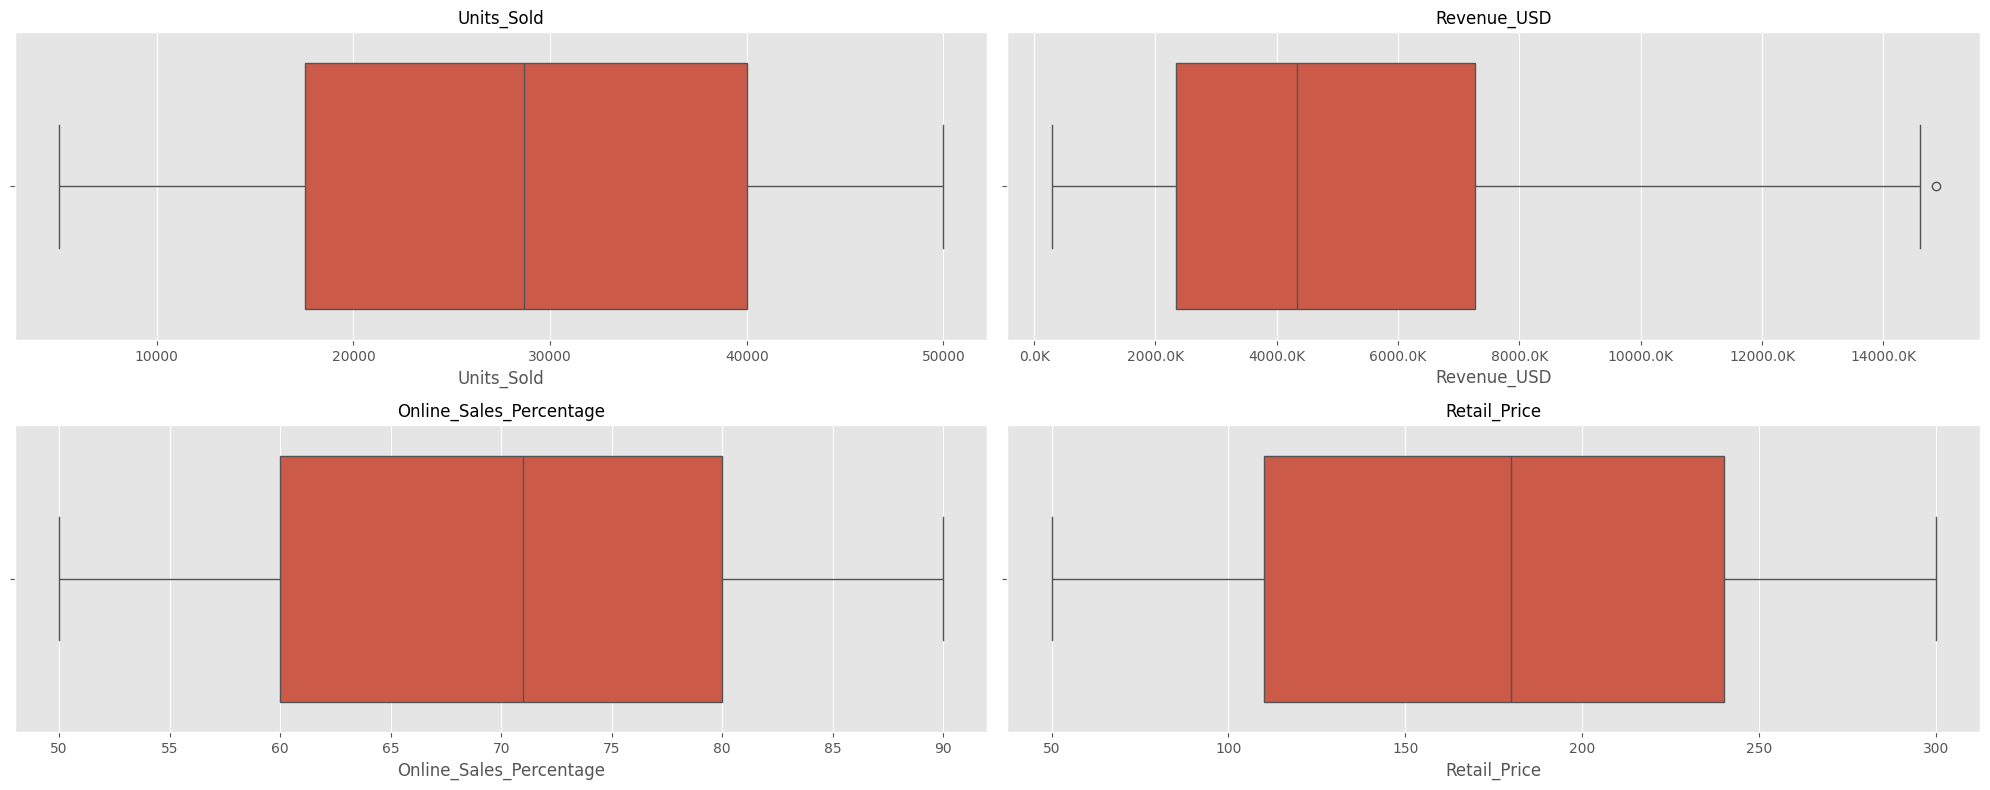

In [32]:
# list of numeric indicators
features = [
    "Units_Sold", 
    "Revenue_USD",
    "Online_Sales_Percentage",
    "Retail_Price"
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
axes = axes.flatten()

# define a formatter appends the unit
def revenue_formatter(x, pos):
    # divide by 1000 to convert dollars to thousands (K USD)
    return f'{x/1000}K'

for ax, feature in zip(axes, features):
    sns.boxplot(df_nike, x=feature, ax=ax)
    ax.set_title(feature, fontsize=12)
    
    if feature == "Revenue_USD":
        ax.xaxis.set_major_formatter(mticker.FuncFormatter(revenue_formatter))

plt.tight_layout()
plt.show()

C:\Users\becky\AppData\Local\Temp\ipykernel_26760\777769999.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




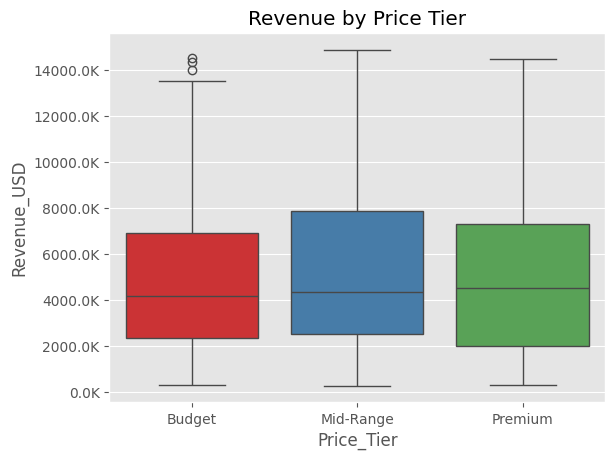

In [33]:
#Revenue by Price Tier
ax = sns.boxplot(df_nike, x="Price_Tier", y="Revenue_USD",palette="Set1")
# define a formatter appends the unit
def revenue_formatter(y, pos):
    return f'{y/1000}K'
ax.yaxis.set_major_formatter(mticker.FuncFormatter(revenue_formatter))

plt.title("Revenue by Price Tier")
plt.show()

C:\Users\becky\AppData\Local\Temp\ipykernel_26760\3638497802.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




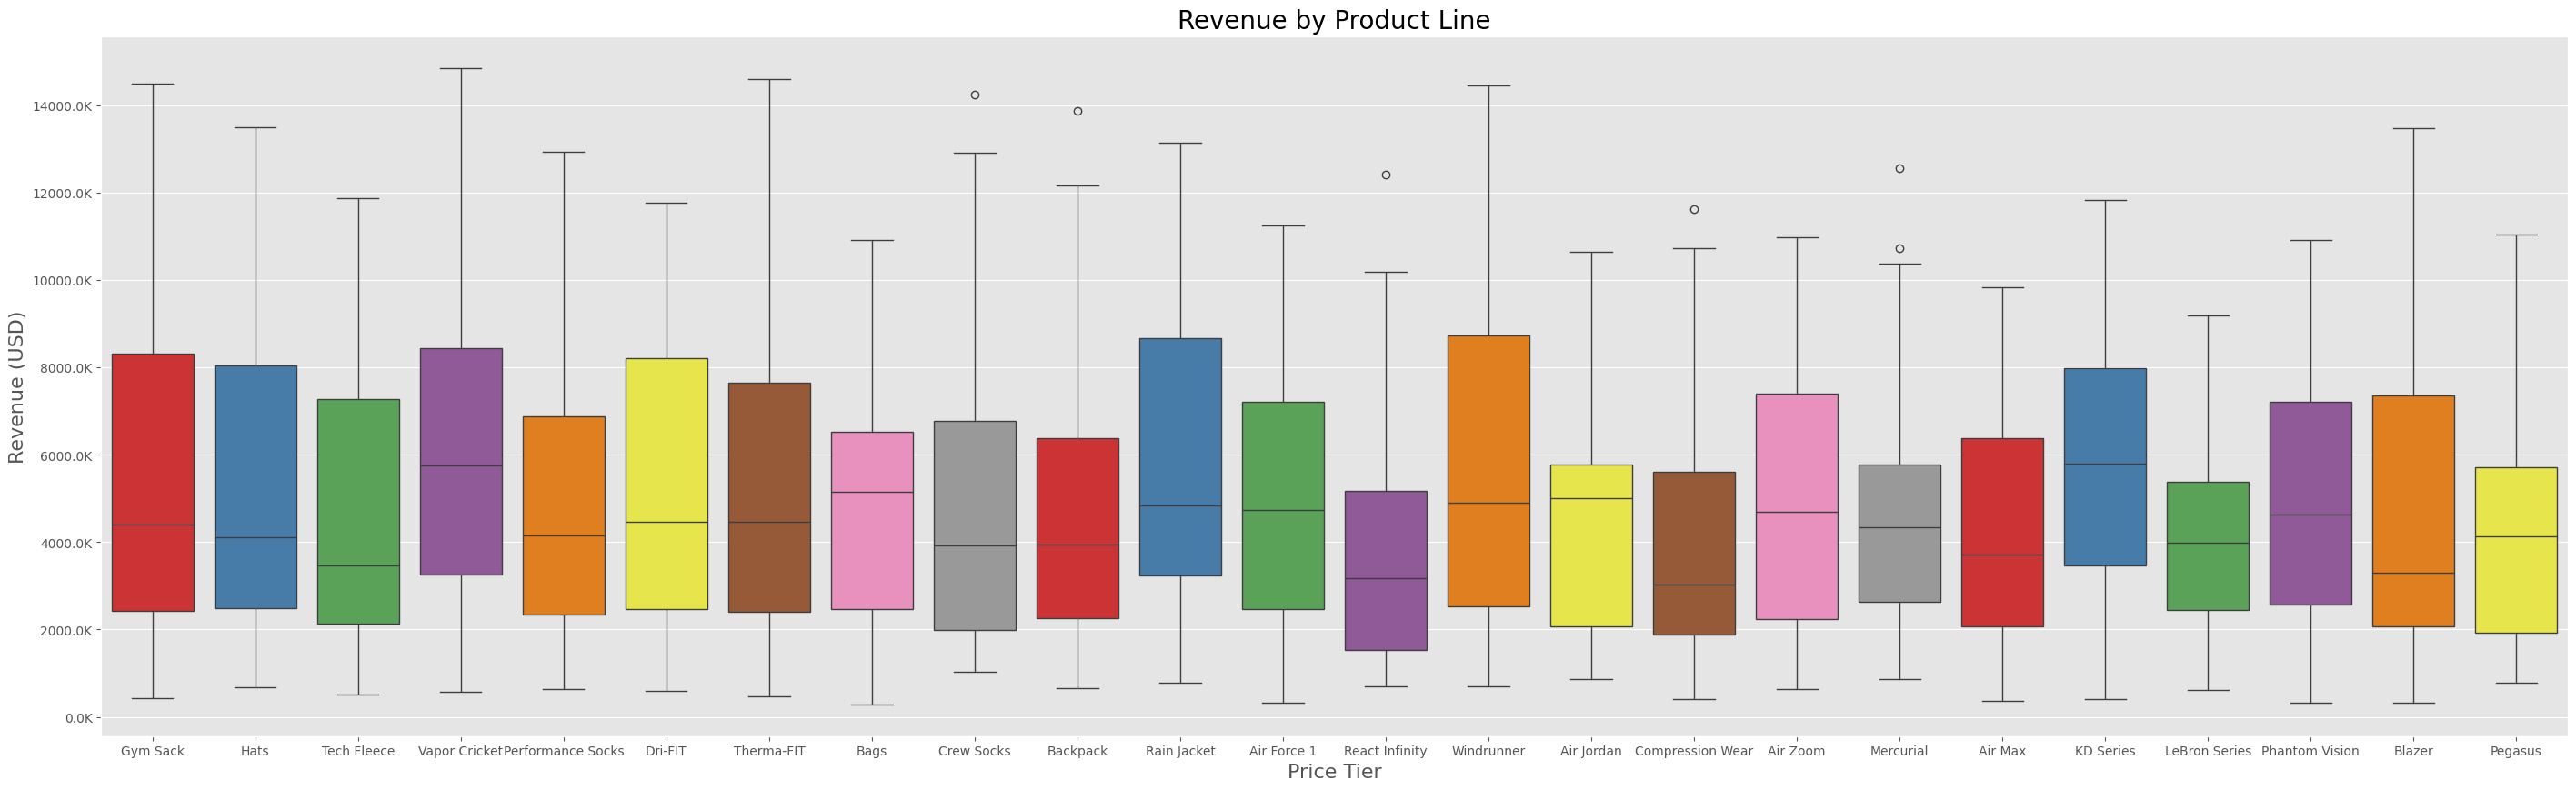

In [34]:
#Revenue by Product Line
#change fig size
plt.figure(figsize=(35, 10))
ax = sns.boxplot(df_nike, x="Product_Line", y="Revenue_USD", palette="Set1")
# define a formatter appends the unit
def revenue_formatter(y, pos):
    return f'{y/1000}K'
ax.yaxis.set_major_formatter(mticker.FuncFormatter(revenue_formatter))

#change front size
plt.title("Revenue by Product Line", fontsize=20)
ax.set_xlabel("Price Tier", fontsize=16)
ax.set_ylabel("Revenue (USD)", fontsize=16)
plt.show()

C:\Users\becky\AppData\Local\Temp\ipykernel_26760\1180692660.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




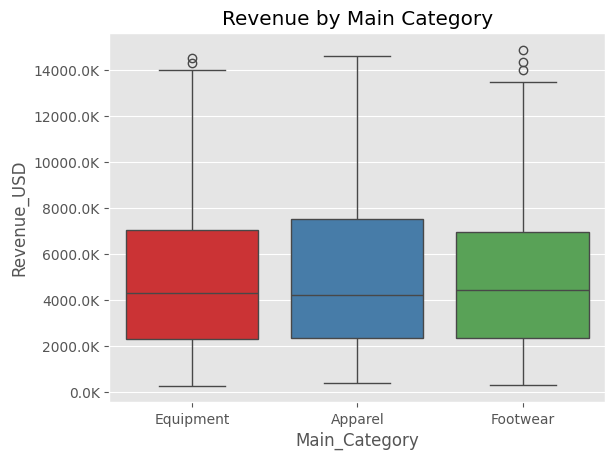

In [35]:
##Revenue by Main Category
ax = sns.boxplot(df_nike, x="Main_Category", y="Revenue_USD", palette="Set1")
# define a formatter appends the unit
def revenue_formatter(y, pos):
    return f'{y/1000}K'
ax.yaxis.set_major_formatter(mticker.FuncFormatter(revenue_formatter))

plt.title("Revenue by Main Category")
plt.show()

C:\Users\becky\AppData\Local\Temp\ipykernel_26760\2346755891.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




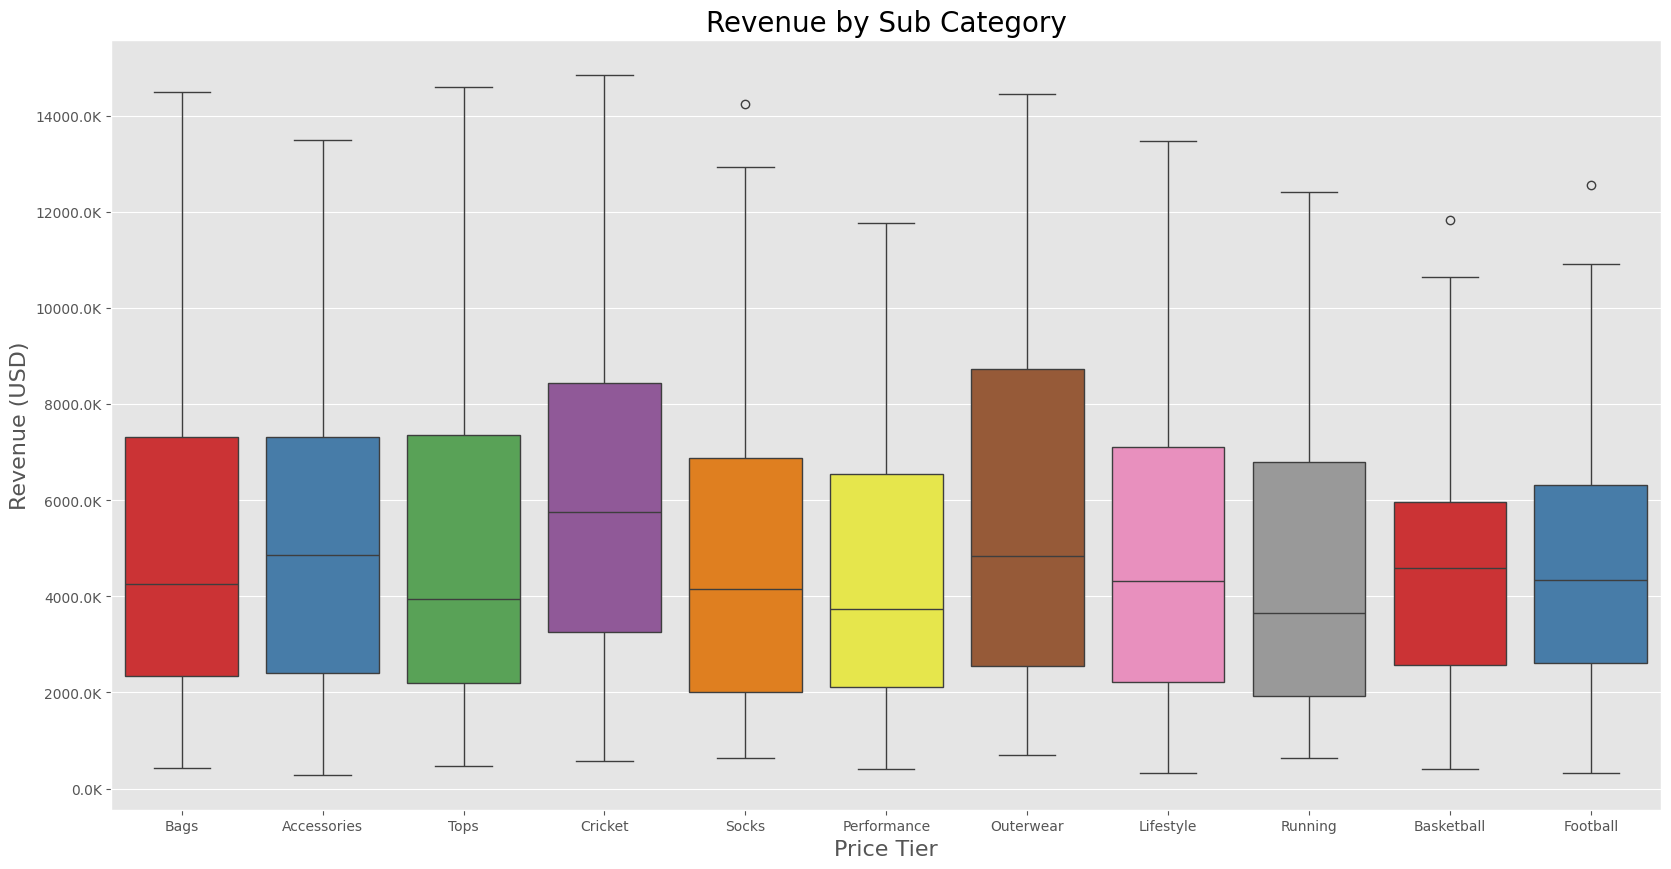

In [36]:
#Revenue by Sub Category
plt.figure(figsize=(20, 10))
ax = sns.boxplot(df_nike, x="Sub_Category", y="Revenue_USD", palette="Set1")
# define a formatter appends the unit
def revenue_formatter(y, pos):
    return f'{y/1000}K'
ax.yaxis.set_major_formatter(mticker.FuncFormatter(revenue_formatter))

#change front size
plt.title("Revenue by Sub Category", fontsize=20)
ax.set_xlabel("Price Tier", fontsize=16)
ax.set_ylabel("Revenue (USD)", fontsize=16)
plt.show()

Data Exploration

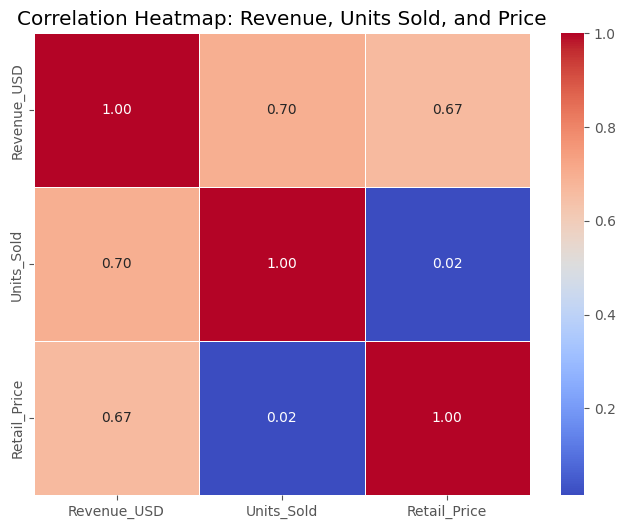

In [37]:
#select all numerical columns
numeric_features = ['Revenue_USD', 'Units_Sold', 'Retail_Price']

# Compute correlation matrix
corr_matrix = df_nike[numeric_features].corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Revenue, Units Sold, and Price")
plt.show()

#set the features
features = [
    'Revenue_USD',
    'Units_Sold',
    'Retail_Price',
    'Price_Tier',
    ]

#set the color
color_discrete_map = {
    'India':"#FF5733",  
    'Greater China':"#33FF57",  
    'Japan':"#3357FF",  
    'Europe':"#FF33A1",  
    'South Korea':"#A133FF",  
    'America':"#33FFF6", 
    'Southeast Asia':"#FF8C33"
    }

# Create scatter matrix
fig = px.scatter_matrix(
    df_nike,
    dimensions = features,
    color= 'Country',
    title = 'Country-by-Country Comparison',
    width = 800,
    height = 800,
    color_discrete_map=color_discrete_map
)


fig.update_traces(diagonal_visible=False)
fig.show()

"""
df_nike['Price_Tier_num'] = df_nike['Price_Tier'].replace({
    'Budget': 1,
    'Mid-Range': 2,
    'Premium': 3
})
"""

In [46]:
df_india = df_nike[df_nike['Country'].str.lower() == 'india']

features = [ 
    'Revenue_USD',
    'Units_Sold',
    'Retail_Price'
]

color_discrete_map = {
    'Budget': "#FF5733",
    'Mid-Range': "#33FF57",
    'Premium': "#3357FF"
}

fig = px.scatter_matrix(
    df_india,
    dimensions=features,
    color="Price_Tier", 
    color_discrete_map=color_discrete_map,
    title='Nike 2024 Global Sales & Pricing Analysis',
    width= 800,
    height= 800
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [50]:
df_india = df_nike[df_nike['Country'].str.lower() == 'india']

features = [ 
    'Revenue_USD',
    'Units_Sold',
    'Retail_Price'
]

color_discrete_map = {
    'Budget': "#FF5733",
    'Mid-Range': "#33FF57",
    'Premium': "#3357FF"
}


pca = PCA()
components = pca.fit_transform(df_india[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df_india["Price_Tier"],
    color_discrete_map=color_discrete_map,
    title='Nike 2024 Global Sales & Pricing Analysis',
    width= 700,
    height= 700
)
fig.update_traces(diagonal_visible=False)
fig.show()

#3 related to revenue 
features = [ 
    'Units_Sold',
    'Retail_Price',
    'Price_Tier_num',
    ]

#set the color
color_discrete_map = {
    'India':"#FF5733",  
    'Greater China':"#33FF57",  
    'Japan':"#3357FF",  
    'Europe':"#FF33A1",  
    'South Korea':"#A133FF",  
    'America':"#33FFF6", 
    'Southeast Asia':"#FF8C33"
    }


pca = PCA()
components = pca.fit_transform(df_nike[features])
#set labels
labels = {
    str(i) : f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}



# Create scatter matrix
fig = px.scatter_matrix(
    components,
    labels = labels,
    color= df_nike['Country'],
    title = 'Nike 2024 Global Sales & Pricing Analysis ',
    width = 1000,
    height = 1000,
    color_discrete_map=color_discrete_map
)


fig.update_traces(diagonal_visible =False)
#fig.write_html("Nike 2024 Global Sales & Pricing Analysis.html", auto_open=True)
fig.show()

# 3 indicators that least affect revenue
features = df_nike[
    ['Units_Sold',
    'Retail_Price',
    'Price_Tier_num']
    ]

pca = PCA(n_components=3)
components = pca.fit_transform(features)
color_discrete_map = {
    'India':"#FF5733",  
    'Greater China':"#33FF57",  
    'Japan':"#3357FF",  
    'Europe':"#FF33A1",  
    'South Korea':"#A133FF",  
    'America':"#33FFF6", 
    'Southeast Asia':"#FF8C33"
    }

total_var = pca.explained_variance_ratio_.sum() * 100

# Create scatter matrix
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_nike['PlacementStatus'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    color_discrete_map =color_discrete_map
)
fig.show()

In [ ]:
# Create a new column for bubble size (Retail Price)
df_nike['Bubble_Size'] = df_nike['Retail_Price'] / df_nike['Retail_Price'].max() * 100  # Normalize size

# Create Bubble Chart
fig = px.scatter(
    df_nike,
    x="Units_Sold",
    y="Revenue_USD",
    size="Bubble_Size",  # Retail Price determines bubble size
    color="Country",
    title="Revenue vs Units Sold (Bubble Size = Retail Price)",
    hover_data=["Retail_Price"],  # Show Retail Price on hover
    width=1000,
    height=600,
    color_discrete_map=color_discrete_map
)

fig.update_layout(xaxis_title="Units Sold", yaxis_title="Revenue (USD)")
fig.show()

In [ ]:


# set the month order
sort_month = ["January", "February", "March", "April", "May", "June", 
              "July", "August", "September", "October", "November", "December"]
df_nike["Month"] = pd.Categorical(df_nike["Month"], categories=sort_month, ordered=True)

df_nike = df_nike[['Month', 'Country', 'Units_Sold', 'Revenue_USD', 'Retail_Price']]
# convert Revenue_USD and Units_Sold to more human_readable format
df_nike["Revenue_USD_temp"] = df_nike["Revenue_USD"] / 1_000_000  # Convert to Millions (M)
df_nike["Units_Sold_temp"] = df_nike["Units_Sold"] / 1_000  # Convert to Thousands (K)

# normalize bubble size
df_nike["Bubble_Size"] = df_nike["Retail_Price"] / df_nike["Retail_Price"].max() * 100

# ensure months are ordered correctly
df_nike["Month"] = pd.Categorical(df_nike["Month"], categories=sort_month, ordered=True)

# extract unique months and countries
months = sort_month
countries = df_nike["Country"].unique()

# define color mapping for countries
color_discrete_map = {
    'India': "#FF5733",  
    'Greater China': "#33FF57",  
    'Japan': "#3357FF",  
    'Europe': "#FF33A1",  
    'South Korea': "#A133FF",  
    'America': "#33FFF6", 
    'Southeast Asia': "#FF8C33"
}

# Initialize figure dictionary
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}

# layout settings
fig_dict["layout"]["width"] = 1400
fig_dict["layout"]["height"] = 600 
fig_dict["layout"]["xaxis"] = {
    "title": "Revenue (Million USD)",
    "type": "linear",
    "tickmode": "array",
    "tickvals": list(range(0, 16, 2)),  # show label as 0M 2M 4M ... 
    "ticktext": [f"{i}M" for i in range(0, 16, 2)]
}
fig_dict["layout"]["yaxis"] = {"title": "Units Sold (K)"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": 300,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

# timeline slider 
sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "Month: ",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# 🔹 Create Initial Data (First Month)
first_month = months[0]
for country in countries:
    dataset_by_month = df_nike[df_nike["Month"] == first_month]
    dataset_by_country = dataset_by_month[
        dataset_by_month["Country"] == country]

    data_dict = {
        "x": list(dataset_by_country["Revenue_USD_temp"]),
        "y": list(dataset_by_country["Units_Sold_temp"]),
        "mode": "markers",
        "text": list(dataset_by_country["Country"]),
        "marker": {
            "sizemode": "area",
            "sizeref": 2.0 * max(df_nike["Bubble_Size"]) / (100**2),
            "size": list(dataset_by_country["Bubble_Size"]),
            "color": color_discrete_map.get(country, "#000000")
        },
        "name": country
    }
    fig_dict["data"].append(data_dict)

# for frame
for month in months:
    frame = {"data": [], "name": str(month)}
    for country in countries:
        dataset_by_month = df_nike[df_nike["Month"] == month]
        dataset_by_country = dataset_by_month[
            dataset_by_month["Country"] == country]

        data_dict = {
            "x": list(dataset_by_country["Revenue_USD_temp"]),
            "y": list(dataset_by_country["Units_Sold_temp"]),
            "mode": "markers",
            "text": list(dataset_by_country["Country"]),
            "marker": {
                "sizemode": "area",
                "sizeref": 2.0 * max(df_nike["Bubble_Size"]) / (100**2),
                "size": list(dataset_by_country["Bubble_Size"]),
                "color": color_discrete_map.get(country, "#000000")
            },
            "name": country
        }
        frame["data"].append(data_dict)


    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [month],
        {"frame": {"duration": 300, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": 300}}
    ],
        "label": str(month),
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)

fig_dict["layout"]["sliders"] = [sliders_dict]

# create the fig
fig = go.Figure(fig_dict)
fig.show()


In [ ]:
df_nike['Revenue_USD_formatted'] = df_nike['Revenue_USD'].apply(lambda x: f'{x/1000:.0f}K')
fig = px.scatter(
    df_nike,
    x="Revenue_USD_formatted",
    y="Units_Sold",
    color="Country"
)

fig.show()